# 1 - Preprocessing

In [15]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import matplotlib

# Importing the dataset
dataset = pd.read_excel('Pressure.xlsx')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Encoding categorical data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])],
                       remainder='passthrough')
X = np.array(ct.fit_transform(X))

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 60)

# 2 - Training

## Calling the Decision Tree Regressor

In [16]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 40)

## Applying Grid Search to find the best model hyperparameters

In [17]:
from sklearn.model_selection import GridSearchCV
parameters = [{'max_depth': [8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
               'min_samples_split': [2, 3, 4],
               'min_samples_leaf': [1, 2, 3, 4]}]
grid_search = GridSearchCV(estimator = regressor,
                           param_grid = parameters,
                           scoring = 'r2',
                           cv = 10,
                           n_jobs = -1,
                           verbose = 1,
                           return_train_score=True)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy:", best_accuracy)
print("Best Parameters:", best_parameters)

Fitting 10 folds for each of 132 candidates, totalling 1320 fits
Best Accuracy: 0.9661161808836514
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


## Training the Decision Tree Regression model on the Training set

In [18]:
regressor = DecisionTreeRegressor(max_depth = 10,
                                  min_samples_split = 2,
                                  min_samples_leaf = 1,
                                  random_state = 40)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=40)

## Create a KFold object with 10 splits 

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
folds = KFold(n_splits = 10, shuffle = False)
scores = cross_val_score(regressor, X_train, y_train, scoring='r2', cv=folds)
print (scores)
print (scores.mean())
regressor

[0.99468536 0.84570638 0.98426908 0.99498219 0.97987264 0.97937387
 0.93568633 0.95026196 0.99889382 0.99743019]
0.9661161808836514


DecisionTreeRegressor(max_depth=10, random_state=40)

## Save the model to disk

In [20]:
filename = 'DT_1.sav'
pickle.dump(regressor, open(filename, 'wb'))

# 3 - Prediction

## Load the model from disk

In [ ]:
filename = 'DT_1.sav'
loaded_regressor = pickle.load(open(filename, 'rb'))

## Predicting the Test set results

In [21]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
file = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)
print(file)

[[ 127.66  130.73]
 [ 116.22  115.2 ]
 [ 124.94  119.43]
 [ 267.28  292.65]
 [3608.73 3517.35]
 [ 145.32  150.1 ]
 [ 155.79  152.22]
 [ 143.34  131.18]
 [ 159.83  149.54]
 [ 212.75  216.19]
 [ 194.47  207.89]
 [ 122.23  119.36]
 [ 167.83  219.04]
 [ 116.22  118.64]
 [ 122.23  124.06]
 [ 121.58  126.21]
 [ 122.23  121.06]
 [ 122.23  120.34]
 [ 254.6   242.76]
 [1038.81  642.17]
 [ 103.4   103.93]
 [ 122.87  123.17]
 [ 145.32  148.89]
 [ 138.84  142.08]
 [2351.13 2413.48]
 [ 108.82  106.36]
 [ 127.66  122.85]
 [ 371.88  295.92]
 [ 122.23  122.16]
 [ 104.66  104.27]
 [ 113.82  113.18]
 [ 149.16  132.88]
 [ 121.58  117.35]
 [ 116.49  118.31]
 [ 193.11  185.35]
 [ 145.32  157.91]
 [ 193.11  179.5 ]
 [ 115.02  113.19]
 [ 122.23  121.57]
 [ 804.61  908.62]
 [ 317.6   300.84]
 [ 145.32  156.44]
 [ 175.91  171.16]
 [ 119.38  122.24]
 [1447.06  873.3 ]
 [ 108.82  108.65]
 [ 122.87  120.5 ]
 [ 145.23  155.48]
 [ 170.04  186.31]
 [ 111.15  113.86]
 [ 170.04  173.98]
 [ 155.79  155.36]
 [ 145.23  1

# 4 - Evaluating the Model Performance

### R2

In [22]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print (r2)

0.9760747500966183


### Adj R2

In [23]:
adj_r2 = 1 - ((1 - r2) * (len(X_test) - 1) / (len(X_test) - len (X_test[0]) - 1))
print (adj_r2)

0.9754728570172879


### RMSE

In [24]:
import math
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(y_test, y_pred))

136.0526466933457

### MAE

In [25]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

42.11176095097315

## Visualize

Text(0, 0.5, 'Predicted data')

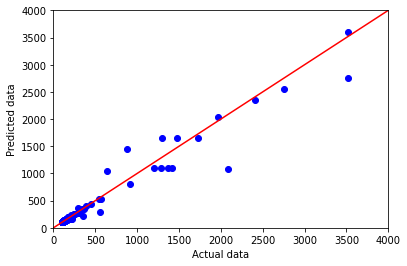

In [26]:
plt.scatter(y_test, y_pred, color="blue")
plt.plot ([0,4000],[0,4000], color = "red")
plt.axis ([0,4000,0,4000])
plt.xlabel ('Actual data')
plt.ylabel ('Predicted data')

## Error percentage visualization

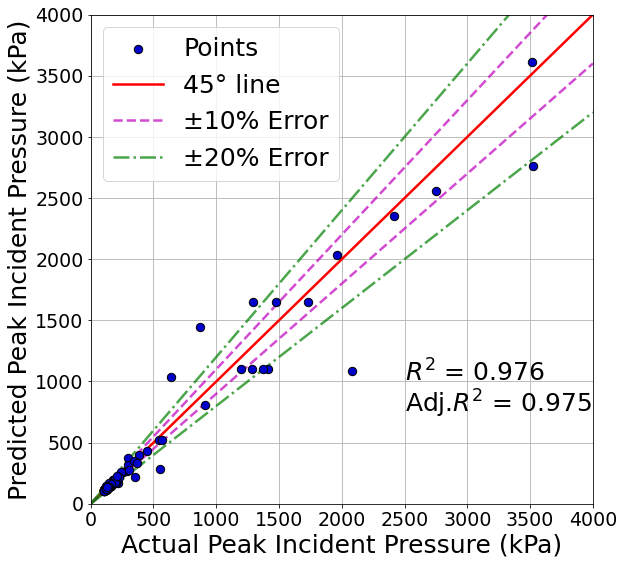

In [27]:
# Generate data

from sklearn.metrics import r2_score
# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))


#y = y_pred         # Model on prvious line is called here
#x = y_test



# Add scatterplot
ax.scatter(y_test, y_pred, s=70, alpha=1, edgecolors="k",c='mediumblue',zorder=5, label = 'Points')

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
# b, a = np.polyfit(x, y, deg=1)

# Create sequence of 50 numbers from 0 to 5 
#xseq = np.linspace(0, 5)



plt.ylabel('Predicted Peak Incident Pressure (kPa)',fontsize = 25)
plt.xlabel('Actual Peak Incident Pressure (kPa)',fontsize = 25)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)


# Plot regression line
# ax.plot(xseq, a + b * xseq, color="Red", lw=2.5,label='X=Y',alpha=1);


x1 = np.linspace(0,4000)

plt.plot(x1, x1, 'Red', label='45\N{DEGREE SIGN} line',lw=2.5,alpha=1)
plt.plot(x1, 1.1*x1, '--m', label='\u00B110% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.9*x1,'m', linestyle='--',lw=2.5,alpha=0.7)
plt.plot(x1, 1.2*x1, '-.g', label='\u00B120% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.8*x1,'-.g',lw=2.5,alpha=0.7)

plt.ylim(0, 4000)
plt.xlim(0, 4000)
plt.legend(loc='upper left',fontsize = 25)

plt.grid()

ax.spines['left'].set_color('black')        # setting up Y-axis tick color to red
ax.spines['bottom'].set_color('black')         #setting up above X-axis tick color to red



ax.annotate("$R^2$ = {:.3f}".format(r2), (2500, 1000),fontsize = 25)  #Model is called here
ax.annotate("Adj.$R^2$ = {:.3f}".format(adj_r2), (2500, 750),fontsize = 25)

plt.savefig('plot1.png', dpi = 600, bbox_inches = 'tight')

## Error margins

In [28]:
count1 = 0
for i in range(len(y_pred)):
    line1 = y_pred[i] - 0.9*y_test[i]
    line2 = y_pred[i] - 1.1*y_test[i]
    #print ('line 1 ', line1)
    #print ('line 2 ', line2)
    mask1 = (line1 > 0) & (line2 < 0)
    #print (mask)
    count1 = np.sum(mask1+count1)
    #print (count)

count2 = 0
for j in range(len(y_pred)):
    line3 = y_pred[j] - 0.8*y_test[j]
    line4 = y_pred[j] - 1.2*y_test[j]
    mask2 = (line3 > 0) & (line4 < 0)
    count2 = np.sum(mask2+count2)


count3 = 0    
for k in range(len(y_pred)):
    line5 = y_pred[k] - 0.8*y_test[k]
    line6 = y_pred[k] - 1.2*y_test[k]
    mask3 = (line5 < 0) or (line6 > 0)
    count3 = np.sum(mask3+count3)
   

print ('Within 10% margin', format((count1/len (y_pred)),'.2%'))
print ('Within 20% margin', format((count2/len (y_pred)),'.2%'))
print ('Out of 20% margin', format((count3/len (y_pred)),'.2%'))

Within 10% margin 86.59%
Within 20% margin 93.90%
Out of 20% margin 6.10%


## <500 kPa

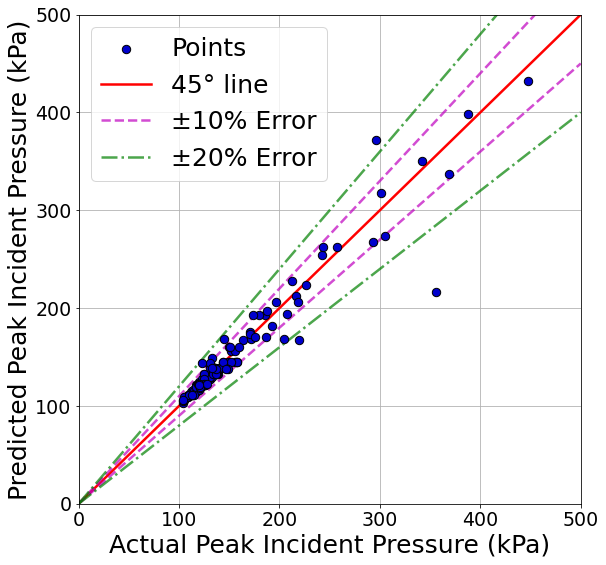

In [29]:
from sklearn.metrics import r2_score
# Initialize layout
fig1, bx = plt.subplots(figsize = (9, 9))


#y = y_pred         # Model on prvious line is called here
#x = y_test



# Add scatterplot
bx.scatter(y_test, y_pred, s=70, alpha=1, edgecolors="k",c='mediumblue',zorder=5, label = 'Points')

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
# b, a = np.polyfit(x, y, deg=1)

# Create sequence of 50 numbers from 0 to 5 
#xseq = np.linspace(0, 5)



plt.ylabel('Predicted Peak Incident Pressure (kPa)',fontsize = 25)
plt.xlabel('Actual Peak Incident Pressure (kPa)',fontsize = 25)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)


# Plot regression line
# ax.plot(xseq, a + b * xseq, color="Red", lw=2.5,label='X=Y',alpha=1);


x2 = np.linspace(0,500)

plt.plot(x2, x2, 'Red', label='45\N{DEGREE SIGN} line',lw=2.5,alpha=1)
plt.plot(x2, 1.1*x2, '--m', label='\u00B110% Error',lw=2.5,alpha=0.7)
plt.plot(x2, 0.9*x2,'m', linestyle='--',lw=2.5,alpha=0.7)
plt.plot(x2, 1.2*x2, '-.g', label='\u00B120% Error',lw=2.5,alpha=0.7)
plt.plot(x2, 0.8*x2,'-.g',lw=2.5,alpha=0.7)

plt.ylim(0, 500)
plt.xlim(0, 500)
plt.legend(loc='upper left',fontsize = 25)

plt.grid()

bx.spines['left'].set_color('black')        # setting up Y-axis tick color to red
bx.spines['bottom'].set_color('black')         #setting up above X-axis tick color to red



#ax.annotate("$R^2$ = {:.3f}".format(r2_score(y_test, y_pred)), (5000, 2000),fontsize = 25)  #Model is called here

#plt.savefig('plot1.png', dpi = 600, bbox_inches = 'tight')

## Print Output

In [30]:
df = pd.DataFrame(file).T
df.to_excel(excel_writer = "E:/PhD/Machine Learning/Paper4_2D_Visualization/Pressure/DT_1.xlsx")

# 5 - Contour plot visualization

### Define the extents of the 2D space and the mesh size

In [52]:
start, stop, n_values = -8, 8, 400

x_vals = np.linspace(start, stop, n_values)
y_vals = np.linspace(start, stop, n_values)
X, Y = np.meshgrid(x_vals, y_vals)

Z = np.sqrt(X**2 + Y**2)
print (Z.shape)

d = Z.reshape(-1)
d = d.reshape(len (d), 1)
print (d)
print (d.shape)
print ("value", d[4,0])

(400, 400)
[[11.31]
 [11.29]
 [11.26]
 ...
 [11.26]
 [11.29]
 [11.31]]
(160000, 1)
value 11.20086212938561


### Filter unique standoff distances

In [5]:
d_list = [tuple(row) for row in d]
#print (d_list)
print (type(d_list))
standoff_dis_list = list(set(d_list))
print (len(standoff_dis_list))

<class 'list'>
29


### Defining charge mass and charge type

In [53]:
m = np.repeat(17.7, len(d)).reshape(len(d),1)

print (m.shape)
print (m)

c = np.repeat(1, len(d)).reshape(len(d),1)
print (c.shape)
print (c)

t = np.repeat(0, len(d)).reshape(len(d),1)
print (t.shape)
print (t)

(160000, 1)
[[17.7]
 [17.7]
 [17.7]
 ...
 [17.7]
 [17.7]
 [17.7]]
(160000, 1)
[[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]
(160000, 1)
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


### Forming 2D array to predict peak incident pressure

In [54]:
arr = np.concatenate ((c, t, m, d), axis = 1)
print (arr)

[[ 1.    0.   17.7  11.31]
 [ 1.    0.   17.7  11.29]
 [ 1.    0.   17.7  11.26]
 ...
 [ 1.    0.   17.7  11.26]
 [ 1.    0.   17.7  11.29]
 [ 1.    0.   17.7  11.31]]


In [55]:
Z_pred = regressor.predict(arr)
print (Z_pred)

[138.84 138.84 138.84 ... 138.84 138.84 138.84]


### Point predictions

In [56]:
Z_pred = Z_pred.reshape(400, 400)
print (Z_pred)

[[138.84 138.84 138.84 ... 138.84 138.84 138.84]
 [138.84 138.84 145.32 ... 145.32 138.84 138.84]
 [138.84 145.32 145.32 ... 145.32 145.32 138.84]
 ...
 [138.84 145.32 145.32 ... 145.32 145.32 138.84]
 [138.84 138.84 145.32 ... 145.32 138.84 138.84]
 [138.84 138.84 138.84 ... 138.84 138.84 138.84]]


### Peak incident pressure contours

In [57]:
cdict = {'red': ((0.0, 0.0, 0.0),
                 (0.25, 0.2, 0.2),
                 (0.5, 0.0, 0.0),
                 (0.75, 1.0, 1.0),
                 (1.0, 1.0, 1.0)),
        'green':((0.0, 0.0, 0.0),
                 (0.25, 1.0, 1.0),
                 (0.5, 1.0, 1.0),
                 (0.75, 1.0, 1.0),
                 (1.0, 0.0, 0.0)),
        'blue': ((0.0, 1.0, 1.0),
                 (0.25, 1.0, 1.0),
                 (0.5, 0.0, 0.0),
                 (0.75, 0.0, 0.0),
                 (1.0, 0.0, 0.0))}

In [58]:
my_cmap = matplotlib.colors.LinearSegmentedColormap('my_colormap',cdict,256)

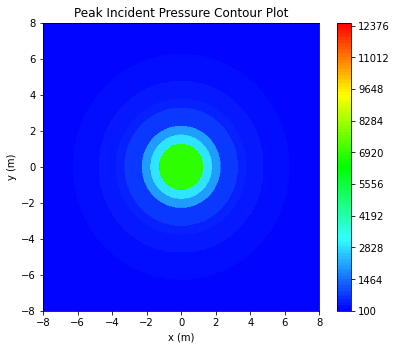

In [61]:
fig = plt.figure(figsize=(6,5))
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes([left, bottom, width, height]) 
levels = np.linspace(100, 12500, 101)
cp = plt.contourf(X, Y, Z_pred, levels = levels, cmap = my_cmap)
plt.colorbar(cp)

ax.set_title('Peak Incident Pressure Contour Plot')
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
plt.show()